In [298]:
# import the required packages
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor,  BaggingClassifier, AdaBoostClassifier, VotingClassifier
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier 
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

## 1. HR Analytics

### 1.1 Load and Sample the data

In [299]:
# Load Data 
data = pd.read_csv('hr_data_new.csv')

In [300]:
#stratified sampling
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [301]:
#promoted
df1=data[data['is_promoted']==1]
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,7,7,0,0,2,1,0.375,5,0,1,0,0,1
39,7,28,0,1,2,1,0.325,5,2,1,0,0,1
60,7,4,2,1,0,1,0.750,4,3,1,0,0,1
66,1,22,0,1,0,1,0.175,3,0,1,1,1,1
67,7,22,0,1,2,1,0.175,3,0,0,0,2,1


In [302]:
#not promoted
df0=data[data['is_promoted']==0]
df0.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,7,2,0,2,1,0.375,5,3,1,0,0,0
1,4,22,0,1,0,1,0.250,5,1,0,0,1,0
2,7,19,0,1,2,1,0.350,3,2,0,0,0,0
3,7,23,0,1,0,2,0.475,1,3,0,0,0,0
4,8,26,0,1,0,1,0.625,3,0,0,0,2,0


In [303]:
df0_sampled = df0.sample(n=len(df1), random_state=2).copy()
df0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            4668 non-null   int64  
 1   region                4668 non-null   int64  
 2   education             4668 non-null   int64  
 3   gender                4668 non-null   int64  
 4   recruitment_channel   4668 non-null   int64  
 5   no_of_trainings       4668 non-null   int64  
 6   age                   4668 non-null   float64
 7   previous_year_rating  4668 non-null   int64  
 8   length_of_service     4668 non-null   int64  
 9   KPIs_met >80%         4668 non-null   int64  
 10  awards_won?           4668 non-null   int64  
 11  avg_training_score    4668 non-null   int64  
 12  is_promoted           4668 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 510.6 KB


In [304]:
data_new=pd.concat([df1,df0_sampled],axis=0)
data_new['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [305]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   int64  
 1   region                9336 non-null   int64  
 2   education             9336 non-null   int64  
 3   gender                9336 non-null   int64  
 4   recruitment_channel   9336 non-null   int64  
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   float64
 7   previous_year_rating  9336 non-null   int64  
 8   length_of_service     9336 non-null   int64  
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   int64  
 12  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 1021.1 KB


### 1.2 Build the Model(s)

. logistic regression, decision tree, artificial neural network, ensemble models

In [306]:
#Train the Model using training set
# Define Model Inputs (X) and Output (y)
X = data_new.drop('is_promoted',axis=1)
y = data_new["is_promoted"]

In [307]:
X

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
11,7,7,0,0,2,1,0.375,5,0,1,0,0
39,7,28,0,1,2,1,0.325,5,2,1,0,0
60,7,4,2,1,0,1,0.750,4,3,1,0,0
66,1,22,0,1,0,1,0.175,3,0,1,1,1
67,7,22,0,1,2,1,0.175,3,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
20795,8,31,0,1,0,2,0.575,4,3,0,0,3
23088,0,7,3,1,2,1,0.275,4,0,0,0,3
24445,4,27,0,1,0,1,0.325,1,2,0,0,1
24762,0,24,0,1,0,1,0.100,3,0,0,0,3


In [308]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## logistic regression

In [309]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [310]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[ 8.32669639e-02 -7.99089427e-03  3.01719767e-02  8.41471260e-02
  -4.75031833e-04 -2.18949971e-01 -8.27140064e-01  3.83363453e-01
   9.03667261e-02  1.61869707e+00  2.18163194e+00  5.34181001e-01]]
[-3.17142106]


In [311]:
# Calculated the fitted values for training set
y_fitted = lg.predict(X_train) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train)[:,0] # returns probabilities

In [312]:
print(y_fitted)
print(y_fitted_prob)

[0 0 0 ... 1 0 1]
[0.92220431 0.68548018 0.70129271 ... 0.47869761 0.68598062 0.20364135]


 ## Evaluate the Model using testing set

In [313]:
# Evaluate the Model using testing set
# calculated the testing accuracy
print(lg.score(X_train, y_train), '(Train Accuracy)')
print(lg.score(X_test, y_test), '(Test Accuracy)')

0.7192042846212701 (Train Accuracy)
0.714744734023563 (Test Accuracy)


## improve the model

In [314]:
#improve the model
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.562725
         Iterations 6


In [315]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6523
Method:                           MLE   Df Model:                           11
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.1882
Time:                        13:45:37   Log-Likelihood:                -3677.4
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department              -0.0121      0.010     -1.169      0.242      -0.032       0.008
region                  -0.0267      0.003     -9.427      0.000      -0.032      -0.021
education                0.0065      0.029      0.220      0.826      -0.051       0.064
gender                  -0.1833      0.060     -3.047      0.002      -0.301      -0.065
recruitment_channel     -0.0886      0.029     -3.087      0.002      -0.145      -0.032
no_of_trainings         -0.5976      0.051    -11.742      0.000      -0.697      -0.498
age                     -1.9111      0.183    -10.442      0.000      -2.270      -1.552
previous_year_rating     0.1350      0.022      6.052      0.000       0.091       0.179
length_of_service        0.0925      0.029      3.226      0.001       0.036       0.149
KPIs_met >80%            1.5209      0.059     25.589      0.000       1.404       1.637
awards_won?              2.1802      0.165     13.195      0.000       1.856       2.504
avg_training_score       0.3755      0.026     14.565      0.000       0.325       0.426
========================================================================================
"""

From the above model summary, we can see that RFA_2F, LASTGIFT and LASTDATE have close to ZERO p-value (i.e. the column P>|z|). It means we have very high confidence on the coefficients of these features, or say these features are the most strong indicators to predict TARGET_B.

On the other hand, AGE,AVGGIFT,NGIFTALL,TIMELAG, RAMNTALL and FISTDATE have very high p-value. It means we have very low confidence on the coeficients of these features and these features may not be the good indicators to predict TARGET_B.

In [316]:
# Define Model Inputs (X) and Output (y)
X_new = data_new[["region", "no_of_trainings", "age", "previous_year_rating", "KPIs_met >80%", "awards_won?", "avg_training_score"]]
y_new = data_new[["is_promoted"]]

In [317]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=10)

In [318]:
# Create and Train the Logistic Regression Model
lg = LogisticRegression(solver='lbfgs', max_iter=1000)
lg.fit(X_train_new, y_train_new)
# Use the cross_val_score function to evaluate the model
scores = cross_val_score(lg, X_new, y_new, cv=5)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [319]:
# calculated the training accuracy
print(lg.score)


# calculated the fitted values for training set
y_fitted = lg.predict(X_train_new) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train_new)[:,0] # returns probabilities

print(y_fitted_prob)

<bound method ClassifierMixin.score of LogisticRegression(max_iter=1000)>
[0.86582188 0.36163607 0.72267601 ... 0.44888954 0.87887155 0.16549802]


In [320]:
# calculated the testing accuracy
print(lg.score(X_train_new, y_train_new), '(Train Accuracy)')
print(lg.score(X_test_new, y_test_new), '(Test Accuracy)')

0.7173680183626626 (Train Accuracy)
0.7261692252766869 (Test Accuracy)


In [321]:
# Use Stats Model to evaluate the p-value of each coefficient
lg2 = sm.Logit(y_train_new, X_train_new).fit()
lg2.summary()

Optimization terminated successfully.
         Current function value: 0.573340
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6528
Method:                           MLE   Df Model:                            6
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.1728
Time:                        13:45:46   Log-Likelihood:                -3746.8
converged:                       True   LL-Null:                       -4529.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
region                  -0.0251      0.003     -9.215      0.000      -0.030      -0.020
no_of_trainings         -0.6165      0.049    -12.598      0.000      -0.712      -0.521
age                     -1.6987      0.141    -12.066      0.000      -1.975      -1.423
previous_year_rating     0.0849      0.021      4.051      0.000       0.044       0.126
KPIs_met >80%            1.4945      0.059     25.377      0.000       1.379       1.610
awards_won?              2.0002      0.164     12.231      0.000       1.680       2.321
avg_training_score       0.3643      0.025     14.302      0.000       0.314       0.414
========================================================================================
"""

In [322]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(lg, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.71933583 0.71682956 0.71602624 0.7204445  0.71267907]
test_score:  [0.71252677 0.72576326 0.71344403 0.70594537 0.72897697]


In [323]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7170630428660567
cross val testing accuracy is: 0.717331277261211


## improve the model

In [324]:
#Build XGBoost Model and Evaluate both training and testing accuracy 
lg_bst = XGBClassifier(LogisticRegression(), n_estimators=200, max_depth=3, learning_rate=1, objective='binary:logistic')
lg_bst.fit(X_train, y_train)

print('training accuracy is: ', lg_bst.score(X_train,y_train))
print('testing accuracy is: ', lg_bst.score(X_test,y_test))

[13:45:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


training accuracy is:  0.8665646518745218
testing accuracy is:  0.7668689753659408


In [325]:
#Build Ada Boost Model and Evaluate both training and testing accuracy
lg_adb = AdaBoostClassifier(LogisticRegression(), n_estimators=300)
lg_adb.fit(X_train, y_train)
print('training accuracy is: ', lg_adb.score(X_train,y_train))
print('testing accuracy is: ', lg_adb.score(X_test,y_test))

training accuracy is:  0.7609793420045907
testing accuracy is:  0.7504462691895751


Bagging classifier

In [29]:
bag_clf = BaggingClassifier(LogisticRegression(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 1.0,
                            n_jobs = -1)

In [30]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False,
                  n_estimators=400, n_jobs=-1)

In [31]:
y_pred = bag_clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.714744734023563

In [33]:
bag_clf = BaggingClassifier(LogisticRegression(), 
                            n_estimators = 300,
                            bootstrap = True,
                            max_samples = 0.7,
                            n_jobs = -1,
                            oob_score = True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.7,
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [34]:
bag_clf.oob_score_

0.7588370313695486

In [35]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7565155301677973

In [36]:
bag_clf = BaggingClassifier(LogisticRegression(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 100,
                            bootstrap_features = True,
                            max_features = 0.8,
                            n_jobs = -1)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False,
                  bootstrap_features=True, max_features=0.8, max_samples=100,
                  n_estimators=400, n_jobs=-1)

In [37]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7176008568368439

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1400
           1       0.72      0.72      0.72      1401

    accuracy                           0.72      2801
   macro avg       0.72      0.72      0.72      2801
weighted avg       0.72      0.72      0.72      2801



#### Feature Importances
If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature's importance by computing the average depth at which it appears accross all trees in the forest. 

Scikit-Learning computes this automatically using `feature_importances_`, details are shown below.

In [39]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
8101,7,7,2,1,0,1,0.275,1,1,0,0,0
43638,5,2,2,1,0,1,0.975,4,3,0,0,2
18508,0,22,0,1,0,1,0.150,3,0,0,0,3
38448,4,2,0,1,2,1,0.975,3,3,0,0,2
34437,1,2,0,0,0,1,0.225,5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34441,7,25,0,1,2,2,0.275,2,1,1,0,0
20578,5,2,2,0,0,1,0.800,3,1,1,0,2
10087,2,2,0,1,0,1,0.075,3,0,1,0,1
18915,8,33,0,1,0,2,0.825,3,3,0,0,3


In [40]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [41]:
lg_bst.feature_importances_

array([0.07523341, 0.02093122, 0.02416341, 0.03072513, 0.02300428,
       0.02243807, 0.02168845, 0.09789483, 0.02899809, 0.33191553,
       0.14799334, 0.17501423], dtype=float32)

In [42]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(lg_bst.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
9,KPIs_met >80%,0.331916
11,avg_training_score,0.175014
10,awards_won?,0.147993
7,previous_year_rating,0.097895
0,department,0.075233
3,gender,0.030725
8,length_of_service,0.028998
2,education,0.024163
4,recruitment_channel,0.023004
5,no_of_trainings,0.022438


## decision tree model

In [43]:
# Create Decision Tree Model
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

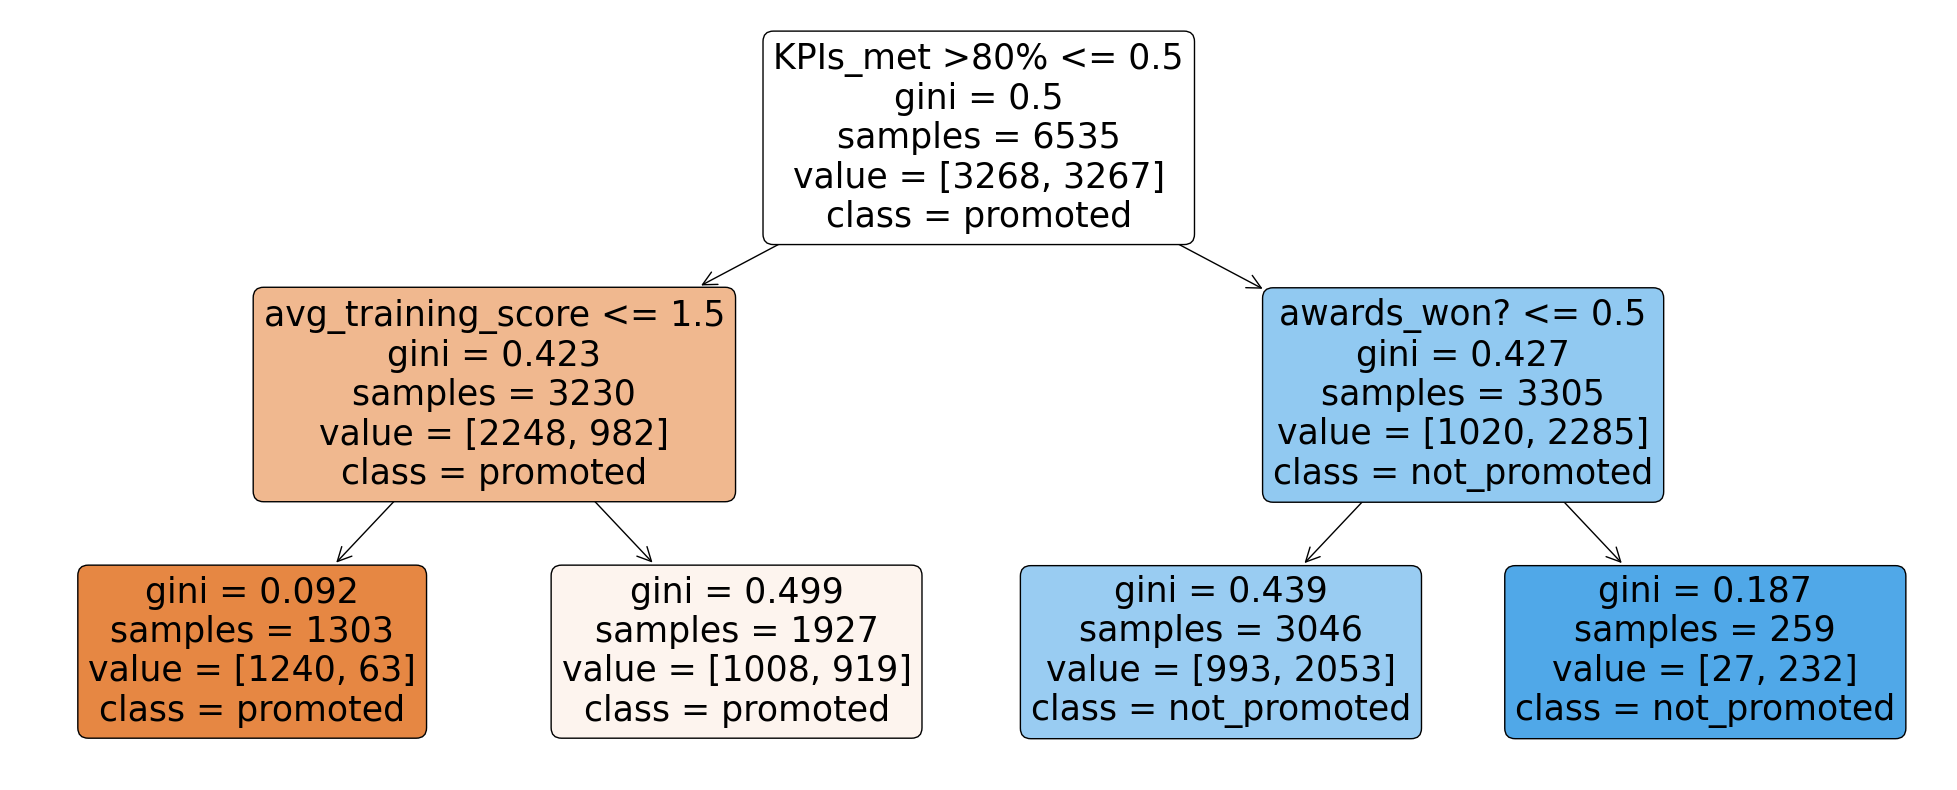

In [44]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(data_new.drop(['is_promoted'], axis=1)),
                class_names = ['promoted', 'not_promoted'],
                rounded = True,
                filled= True)
plt.savefig('tree1.png',format='png')
plt.show()     

In [45]:
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.6936495791889824
the testing accuracy is:  0.682256337022492


In [46]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.7698448937156666
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [47]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7, min_samples_leaf = 1, min_samples_split =10, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10,
                       random_state=1)

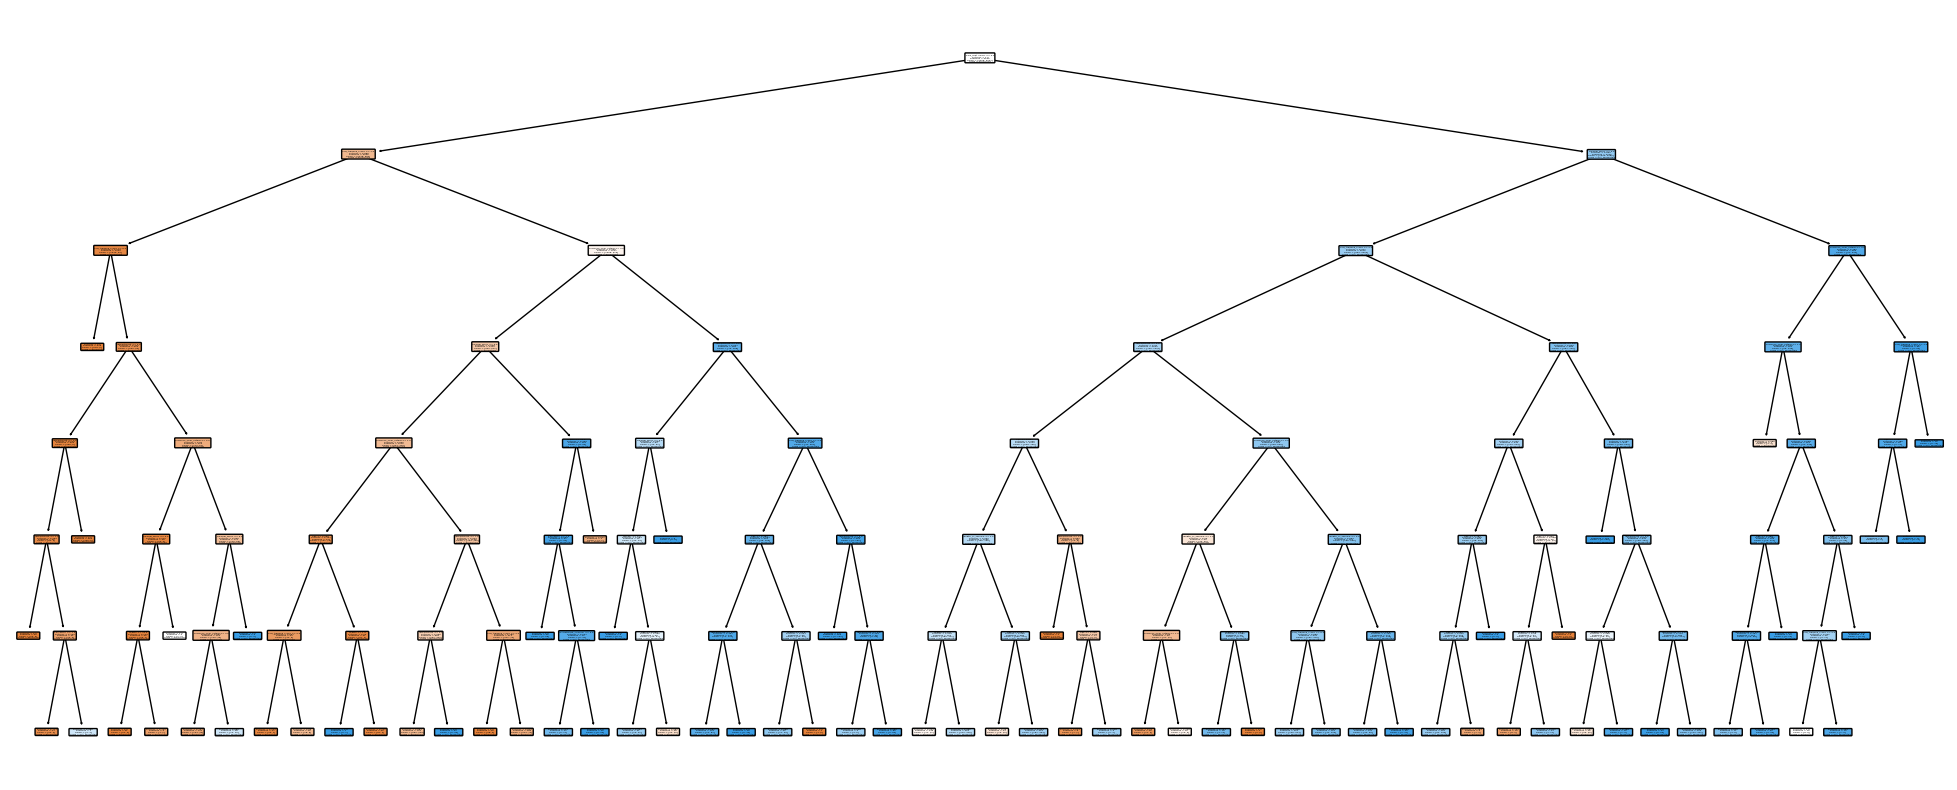

In [48]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(data_new.drop(['is_promoted'], axis=1)),
                class_names = ['promoted', 'not_promoted'],
                rounded = True,
                filled= True)
plt.savefig('tree2.png',format='png')
plt.show() 

 ## Evaluate the Model using testing set

In [49]:
#Evaluate the Model
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7850038255547054
the testing accuracy is:  0.7550874687611567


In [50]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(dt, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.69068024 0.68777614 0.69192663 0.69246218 0.68831169]
test_score:  [0.68843683 0.70005356 0.68344938 0.68130691 0.69791109]


In [51]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.6902313744874996
cross val testing accuracy is: 0.6902315547047847


## improve the model

In [52]:
#Build XGBoost Model and Evaluate both training and testing accuracy 
dt_bst = XGBClassifier(DecisionTreeClassifier(), n_estimators=2000, max_depth=2, learning_rate=1, objective='binary:logistic')
dt_bst.fit(X_train, y_train)

print('training accuracy is: ', dt_bst.score(X_train,y_train))
print('testing accuracy is: ', dt_bst.score(X_test,y_test))

[17:31:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


training accuracy is:  0.8579954093343535
testing accuracy is:  0.7672259907176009


In [53]:
#Build Ada Boost Model and Evaluate both training and testing accuracy
dt_adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
dt_adb.fit(X_train, y_train)
print('training accuracy is: ', dt_adb.score(X_train,y_train))
print('testing accuracy is: ', dt_adb.score(X_test,y_test))

training accuracy is:  0.7618974751338944
testing accuracy is:  0.7525883612995359


Bagging classifier

In [54]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 1.0,
                            n_jobs = -1)

In [55]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=400, n_jobs=-1)

In [56]:
y_pred = bag_clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7136736879685827

In [58]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 300,
                            bootstrap = True,
                            max_samples = 0.7,
                            n_jobs = -1,
                            oob_score = True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.7,
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [59]:
bag_clf.oob_score_

0.7600612088752869

In [60]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7597286683327383

In [61]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 100,
                            bootstrap_features = True,
                            max_features = 0.8,
                            n_jobs = -1)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  bootstrap_features=True, max_features=0.8, max_samples=100,
                  n_estimators=400, n_jobs=-1)

In [62]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7483041770796144

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1400
           1       0.72      0.81      0.76      1401

    accuracy                           0.75      2801
   macro avg       0.75      0.75      0.75      2801
weighted avg       0.75      0.75      0.75      2801



#### Feature Importances
If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature's importance by computing the average depth at which it appears accross all trees in the forest. 

Scikit-Learning computes this automatically using `feature_importances_`, details are shown below.

In [64]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
8101,7,7,2,1,0,1,0.275,1,1,0,0,0
43638,5,2,2,1,0,1,0.975,4,3,0,0,2
18508,0,22,0,1,0,1,0.150,3,0,0,0,3
38448,4,2,0,1,2,1,0.975,3,3,0,0,2
34437,1,2,0,0,0,1,0.225,5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34441,7,25,0,1,2,2,0.275,2,1,1,0,0
20578,5,2,2,0,0,1,0.800,3,1,1,0,2
10087,2,2,0,1,0,1,0.075,3,0,1,0,1
18915,8,33,0,1,0,2,0.825,3,3,0,0,3


In [65]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [66]:
dt_bst.feature_importances_

array([0.06723374, 0.02125834, 0.02120074, 0.03178805, 0.02023744,
       0.01998233, 0.02029517, 0.07853642, 0.03119132, 0.37093282,
       0.10573895, 0.21160471], dtype=float32)

In [67]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(dt_bst.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
9,KPIs_met >80%,0.370933
11,avg_training_score,0.211605
10,awards_won?,0.105739
7,previous_year_rating,0.078536
0,department,0.067234
3,gender,0.031788
8,length_of_service,0.031191
1,region,0.021258
2,education,0.021201
6,age,0.020295


## random forest model

In [68]:
# Build Random Forest Model and Evaluate both training and testing accuracy
rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train,y_train)

print('training accuracy is: ', rf.score(X_train,y_train))
print('testing accuracy is: ', rf.score(X_test,y_test))

training accuracy is:  0.996327467482785
testing accuracy is:  0.7604426990360585


* The high training accuracy suggests the model has low bias. 
* A big gap between training accuracy and testing accuracy suggest the model has high variance. 

Thus, the model is overfitted to the training data.

In [69]:

# Define the hyperparameters and their possible values
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best score:  0.7755164498852334


In [70]:
# Create using the best hyperparameters
rf = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

 ## Evaluate the Model using testing set

In [71]:
#Evaluate the Model
#training acc
train_acc = rf.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = rf.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.8166794185156848
the testing accuracy is:  0.7665119600142806


In [72]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.80623996 0.80867586 0.81255858 0.81041639 0.81055027]
test_score:  [0.76445396 0.77718265 0.77825388 0.78200321 0.78361007]


In [73]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.8096882110043421
cross val testing accuracy is: 0.7771007547979157


## improve the model

In [74]:
#Build XGBoost Model and Evaluate both training and testing accuracy 
rf_bst = XGBClassifier(RandomForestClassifier(), n_estimators=300, max_depth=3, learning_rate=1, objective='binary:logistic')
rf_bst.fit(X_train, y_train)

print('training accuracy is: ', rf_bst.score(X_train,y_train))
print('testing accuracy is: ', rf_bst.score(X_test,y_test))

[17:31:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


training accuracy is:  0.8898240244835501
testing accuracy is:  0.7583006069260978


In [75]:
#Build Ada Boost Model and Evaluate both training and testing accuracy
rf_adb = AdaBoostClassifier(RandomForestClassifier(max_depth=2), n_estimators=400)
rf_adb.fit(X_train, y_train)
print('training accuracy is: ', rf_adb.score(X_train,y_train))
print('testing accuracy is: ', rf_adb.score(X_test,y_test))

training accuracy is:  0.7612853863810253
testing accuracy is:  0.7508032845412352


Bagging classifier

In [76]:
bag_clf = BaggingClassifier(RandomForestClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 1.0,
                            n_jobs = -1)

In [78]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), bootstrap=False,
                  n_estimators=400, n_jobs=-1)

In [79]:
y_pred = bag_clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7629418064976794

In [81]:
bag_clf = BaggingClassifier(RandomForestClassifier(), 
                            n_estimators = 300,
                            bootstrap = True,
                            max_samples = 0.7,
                            n_jobs = -1,
                            oob_score = True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.7,
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [82]:
bag_clf.oob_score_

0.7709257842387146

In [83]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7718671902891824

In [84]:
bag_clf = BaggingClassifier(RandomForestClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 400,
                            bootstrap_features = False,
                            max_features = 0.8,
                            n_jobs = -2)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), bootstrap=False,
                  max_features=0.8, max_samples=400, n_estimators=400,
                  n_jobs=-2)

In [85]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7550874687611567

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1400
           1       0.72      0.84      0.77      1401

    accuracy                           0.76      2801
   macro avg       0.76      0.76      0.75      2801
weighted avg       0.76      0.76      0.75      2801



#### Feature Importances
If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature's importance by computing the average depth at which it appears accross all trees in the forest. 

Scikit-Learning computes this automatically using `feature_importances_`, details are shown below.

In [87]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
8101,7,7,2,1,0,1,0.275,1,1,0,0,0
43638,5,2,2,1,0,1,0.975,4,3,0,0,2
18508,0,22,0,1,0,1,0.150,3,0,0,0,3
38448,4,2,0,1,2,1,0.975,3,3,0,0,2
34437,1,2,0,0,0,1,0.225,5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34441,7,25,0,1,2,2,0.275,2,1,1,0,0
20578,5,2,2,0,0,1,0.800,3,1,1,0,2
10087,2,2,0,1,0,1,0.075,3,0,1,0,1
18915,8,33,0,1,0,2,0.825,3,3,0,0,3


In [88]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [89]:
rf_bst.feature_importances_

array([0.07561355, 0.02174805, 0.02367594, 0.03179103, 0.02191719,
       0.02322755, 0.02175142, 0.08873649, 0.0275254 , 0.35112473,
       0.14157629, 0.17131239], dtype=float32)

In [90]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(rf_bst.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
9,KPIs_met >80%,0.351125
11,avg_training_score,0.171312
10,awards_won?,0.141576
7,previous_year_rating,0.088736
0,department,0.075614
3,gender,0.031791
8,length_of_service,0.027525
2,education,0.023676
5,no_of_trainings,0.023228
4,recruitment_channel,0.021917


## ANN Model

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [92]:
# Create the ann model
mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=2)
# Fit the model to the training set
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=2, solver='sgd')

In [93]:
# print out the model coefficients and intercept
print(mlp.coefs_)
print(mlp.intercepts_)

[array([[ 1.20755304e-01, -4.51218049e-02,  1.97191407e-02,
         1.06045081e-01, -6.15428186e-02,  1.52167735e-02,
         4.15056254e-02,  1.12674232e-01, -2.43268531e-01,
        -1.89021662e-01],
       [ 1.45581687e-02,  3.41714690e-02, -1.00151332e-01,
        -1.72406966e-02, -1.46396676e-01, -5.23164425e-05,
        -1.48986582e-02, -1.75579144e-01,  2.85258909e-02,
        -6.40878080e-02],
       [ 9.10327497e-02, -1.33840037e-01, -6.40320946e-02,
        -1.41698148e-01, -2.35975706e-01, -9.69164828e-03,
        -1.63791306e-01, -2.08052720e-01, -4.80637807e-02,
        -9.42354835e-02],
       [ 1.22297795e-02, -7.32349849e-02,  1.03752927e-01,
         3.03724914e-03,  5.96710304e-03, -7.75550623e-02,
         1.32010314e-01,  4.09126005e-02, -7.76208370e-02,
         1.76979548e-01],
       [ 7.48222763e-02,  9.90034400e-03,  2.18601063e-01,
        -1.31811122e-01,  3.89353310e-02,  2.64248984e-02,
         4.35353305e-02,  1.76787149e-01, -6.46412528e-02,
         2

In [94]:
# Calculated the fitted values for training set
y_fitted = mlp.predict(X_train) # returns 0 or 1
y_fitted_prob = mlp.predict_proba(X_train)[:,1] # returns probabilities

In [95]:
print(y_fitted)
print(y_fitted_prob)

[0 0 0 ... 1 0 1]
[0.0436595  0.39945916 0.39899126 ... 0.59695512 0.30031944 0.77361886]


In [96]:
# calculated the training accuracy
print(mlp.score(X_train, y_train), '(Train Accuracy)')
# calculated the testing accuracy
print(mlp.score(X_test, y_test), '(Test Accuracy)')

0.7355776587605203 (Train Accuracy)
0.7268832559800071 (Test Accuracy)


In [97]:
# Use GridSearch to find the best combination of model hyperparameters

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=2)
param_grid = { "activation" : ["logistic", "relu"],
 "hidden_layer_sizes" : [(5,), (10,), (20,)],
 "max_iter" : [200, 2000, 4000],
 "solver" : ["sgd", "adam"]}
gs = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


0.7517945872027949
{'activation': 'logistic', 'hidden_layer_sizes': (20,), 'max_iter': 2000, 'solver': 'adam'}


In [98]:
# Build the model using the above suggested hyperparameter values

mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(20,), max_iter=2000, solver ='adam', random_state=2)
mlp.fit(X_train,y_train)


MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=2000,
              random_state=2)

 ## Evaluate the Model using testing set

In [99]:
#Evaluate the Model
print(mlp.score(X_train, y_train), '(Train Accuracy)')
print(mlp.score(X_test, y_test), '(Test Accuracy)')


0.7618974751338944 (Train Accuracy)
0.741163870046412 (Test Accuracy)


In [100]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(mlp, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.76955008 0.7608783  0.75097068 0.75458562 0.76449324]
test_score:  [0.7366167  0.76164971 0.75307981 0.74879486 0.76111409]


In [101]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7600955830788685
cross val testing accuracy is: 0.7522510319547557


## improve the model

In [102]:
#Build XGBoost Model and Evaluate both training and testing accuracy 
mlp_bst = XGBClassifier(MLPClassifier(), n_estimators=200, max_depth=2, learning_rate=1, objective='binary:logistic')
mlp_bst.fit(X_train, y_train)

print('training accuracy is: ', mlp_bst.score(X_train,y_train))
print('testing accuracy is: ', mlp_bst.score(X_test,y_test))

[17:59:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


training accuracy is:  0.8140780413159908
testing accuracy is:  0.7836486968939664


In [103]:
#Build Ada Boost Model and Evaluate both training and testing accuracy
mlp_adb = AdaBoostClassifier(MLPClassifier(), n_estimators=60)
mlp_adb.fit(X_train, y_train)
print('training accuracy is: ', mlp_adb.score(X_train,y_train))
print('testing accuracy is: ', mlp_adb.score(X_test,y_test))

training accuracy is:  0.7579188982402448
testing accuracy is:  0.7475901463762942


Bagging classifier

In [104]:
bag_clf = BaggingClassifier(MLPClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 1.0,
                            n_jobs = -1)

In [105]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(), bootstrap=False,
                  n_estimators=400, n_jobs=-1)

In [106]:
y_pred = bag_clf.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.7447340235630132

In [108]:
bag_clf = BaggingClassifier(MLPClassifier(), 
                            n_estimators = 300,
                            bootstrap = True,
                            max_samples = 0.7,
                            n_jobs = -1,
                            oob_score = True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(), max_samples=0.7,
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [109]:
bag_clf.oob_score_

0.7501147666411629

In [110]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7422349161013924

In [111]:
bag_clf = BaggingClassifier(MLPClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 100,
                            bootstrap_features = True,
                            max_features = 0.8,
                            n_jobs = -1)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(), bootstrap=False,
                  bootstrap_features=True, max_features=0.8, max_samples=100,
                  n_estimators=400, n_jobs=-1)

In [112]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.732595501606569

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1400
           1       0.71      0.79      0.75      1401

    accuracy                           0.73      2801
   macro avg       0.74      0.73      0.73      2801
weighted avg       0.74      0.73      0.73      2801



#### Feature Importances
If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature's importance by computing the average depth at which it appears accross all trees in the forest. 

Scikit-Learning computes this automatically using `feature_importances_`, details are shown below.

In [114]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
8101,7,7,2,1,0,1,0.275,1,1,0,0,0
43638,5,2,2,1,0,1,0.975,4,3,0,0,2
18508,0,22,0,1,0,1,0.150,3,0,0,0,3
38448,4,2,0,1,2,1,0.975,3,3,0,0,2
34437,1,2,0,0,0,1,0.225,5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34441,7,25,0,1,2,2,0.275,2,1,1,0,0
20578,5,2,2,0,0,1,0.800,3,1,1,0,2
10087,2,2,0,1,0,1,0.075,3,0,1,0,1
18915,8,33,0,1,0,2,0.825,3,3,0,0,3


In [115]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [116]:
mlp_bst.feature_importances_

array([0.06576483, 0.01898385, 0.02219249, 0.02213299, 0.01265385,
       0.01639384, 0.01723981, 0.10859278, 0.0250721 , 0.3248981 ,
       0.15991342, 0.20616195], dtype=float32)

In [117]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(mlp_bst.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
9,KPIs_met >80%,0.324898
11,avg_training_score,0.206162
10,awards_won?,0.159913
7,previous_year_rating,0.108593
0,department,0.065765
8,length_of_service,0.025072
2,education,0.022192
3,gender,0.022133
1,region,0.018984
6,age,0.017240


## SVM Model

In [118]:
# Build SVM Model and Evaluate both training and testing accuracy 
svc = SVC(C=1, kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)
print('training accuracy is: ', svc.score(X_train,y_train))
print('testibng accuracy is: ', svc.score(X_test,y_test))

training accuracy is:  0.7946442234123948
testibng accuracy is:  0.746876115672974


 ## Evaluate the Model using testing set

In [119]:
from sklearn import svm

In [120]:

# Define the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 10]}

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.7349655700076512


In [121]:
# Build the model using the above suggested hyperparameter values
svc = svm.SVC(C = 1, kernel = 'rbf', gamma = 0.1)

# Train the new SVM model on the entire training set
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [122]:
#Evaluate the Model
print(svc.score(X_train, y_train), '(Train Accuracy)')
print(svc.score(X_test, y_test), '(Test Accuracy)')


0.803672532517215 (Train Accuracy)
0.7472331310246341 (Test Accuracy)


In [123]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(svc, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.80222282 0.80077654 0.80157986 0.80091043 0.80358816]
test_score:  [0.74250535 0.75682914 0.73701125 0.74183182 0.73701125]


In [124]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.8018155636046955
cross val testing accuracy is: 0.7430377605406193


## improve the model

In [125]:
#Build XGBoost Model and Evaluate both training and testing accuracy 

# Convert data into an xgboost-compatible format
dtrain = xgb.DMatrix(X_train, label=y_train)


svc_bst = XGBClassifier(svm.SVC(), n_estimators=1600, max_depth=2, learning_rate=1, objective='binary:logistic')
svc_bst.fit(X_train, y_train)

print('training accuracy is: ', svc_bst.score(X_train,y_train))
print('testing accuracy is: ', svc_bst.score(X_test,y_test))

[19:09:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


training accuracy is:  0.8529456771231828
testing accuracy is:  0.7690110674759014


In [126]:
#Build Ada Boost Model and Evaluate both training and testing accuracy
svc_adb = AdaBoostClassifier(svm.SVC(), n_estimators=100)
svc_adb.fit(X_train, y_train)
print('training accuracy is: ', svc_adb.score(X_train,y_train))
print('testing accuracy is: ', svc_adb.score(X_test,y_test))

training accuracy is:  0.7603672532517215
testing accuracy is:  0.7483041770796144


Bagging classifier

In [127]:
bag_clf = BaggingClassifier(svm.SVC(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 1.0,
                            n_jobs = -1)

In [128]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), bootstrap=False, n_estimators=400,
                  n_jobs=-1)

In [129]:
y_pred = bag_clf.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred)

0.729382363441628

In [131]:
bag_clf = BaggingClassifier(svm.SVC(), 
                            n_estimators = 300,
                            bootstrap = True,
                            max_samples = 0.7,
                            n_jobs = -1,
                            oob_score = True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), max_samples=0.7, n_estimators=300,
                  n_jobs=-1, oob_score=True)

In [132]:
bag_clf.oob_score_

0.7409334353481255

In [133]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7272402713316672

In [134]:
bag_clf = BaggingClassifier(svm.SVC(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 100,
                            bootstrap_features = True,
                            max_features = 0.8,
                            n_jobs = -1)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), bootstrap=False,
                  bootstrap_features=True, max_features=0.8, max_samples=100,
                  n_estimators=400, n_jobs=-1)

In [135]:
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.685112459835773

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1400
           1       0.67      0.73      0.70      1401

    accuracy                           0.69      2801
   macro avg       0.69      0.69      0.68      2801
weighted avg       0.69      0.69      0.68      2801



#### Feature Importances
If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature's importance by computing the average depth at which it appears accross all trees in the forest. 

Scikit-Learning computes this automatically using `feature_importances_`, details are shown below.

In [137]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
8101,7,7,2,1,0,1,0.275,1,1,0,0,0
43638,5,2,2,1,0,1,0.975,4,3,0,0,2
18508,0,22,0,1,0,1,0.150,3,0,0,0,3
38448,4,2,0,1,2,1,0.975,3,3,0,0,2
34437,1,2,0,0,0,1,0.225,5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34441,7,25,0,1,2,2,0.275,2,1,1,0,0
20578,5,2,2,0,0,1,0.800,3,1,1,0,2
10087,2,2,0,1,0,1,0.075,3,0,1,0,1
18915,8,33,0,1,0,2,0.825,3,3,0,0,3


In [138]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [139]:
svc_bst.feature_importances_

array([0.06973278, 0.02214184, 0.0212458 , 0.03450129, 0.02190511,
       0.02048085, 0.02080667, 0.08595169, 0.0314951 , 0.3507333 ,
       0.10874366, 0.21226197], dtype=float32)

In [140]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(svc_bst.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
9,KPIs_met >80%,0.350733
11,avg_training_score,0.212262
10,awards_won?,0.108744
7,previous_year_rating,0.085952
0,department,0.069733
3,gender,0.034501
8,length_of_service,0.031495
1,region,0.022142
4,recruitment_channel,0.021905
2,education,0.021246


### 1.3 Evaluate and Improve the Model(s)

In [141]:
# VotingClassifier with hard voting technique
voting_clf_hard = VotingClassifier(estimators=[
                                                ('lg', lg_bst),
                                               ('rf', rf_bst), 
                                               ('dt', dt_bst),
                                              ('mlp', mlp_bst),
                                              ('svc', svc_bst)],
                                   voting='hard')

In [142]:
#voting_clf_hard.estimators
voting_clf_hard.estimators

[('lg',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=200, n_jobs=12,
                num_parallel_tree=1, predictor='auto', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)),
 ('rf',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight

In [143]:
# to access and look up your estimators by name, you have a dictionary named named_estimators as well.
# This gives you the individual predictors that make up your model by name, the name that you have specified when you set up the voting classifier

voting_clf_hard.named_estimators

{'lg': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=200, n_jobs=12,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 'rf': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=nan,
  

In [144]:
# Let's train our hard voting classifier. It's an estimator object so we call fit on our training data. It is used to train the classifier
# before it can be used to make predictions. This will train all of the individual classifiers in the ensemble

voting_clf_hard.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:22:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

VotingClassifier(estimators=[('lg',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=200, n...
                                            gpu_id=-1, importance_type=None,
                                     

In [145]:
# Trains a VotingClassifier with hard voting on the training data,
# and then makes predictions on the test data using the trained model.

y_pred = voting_clf_hard.predict(X_test)

In [146]:
accuracy_score(y_test, y_pred)

0.7725812209925027

## 2. Airbnb

### 2.1 Load and Sample the data

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt



In [148]:
# Load Data 
df = pd.read_csv('listings_new.csv')

Text(0.5, 0, 'X')

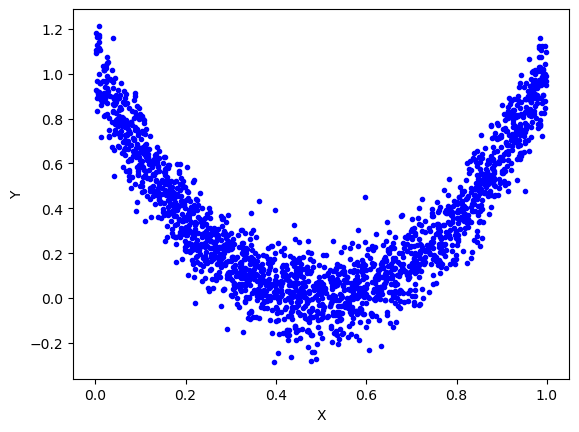

In [150]:
import matplotlib.pyplot as plt
plt.plot(X,y, 'b.')
plt.ylabel('Y')
plt.xlabel('X')

In [151]:
y_train.shape

(1600, 1)

In [152]:
y_train.ravel()

array([ 0.04031722,  0.12551785,  0.51849997, ..., -0.0301615 ,
        0.56852906,  0.08446947])

### 2.2 Build the Model(s)

In [153]:
# Define Model Inputs (X) and Output (y)
X = df.drop(['price'], axis =1)
y = df['price']

In [154]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## linear regression

## build the model

In [155]:
# train the model using training set
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [156]:
# print out the model coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-0.00155341  0.00028548 -0.01054637 -0.00968727 -0.02116988  0.00095242
 -0.00915046  0.00294997]
0.02024516482904535


In [157]:
# Calculated the fitted values for training set
y_fitted = lm.predict(X_train)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(X_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

0.03258820318561533 (Train RMSE)
0.04267250751878282 (Train R^2 Value)


## evaluate and improve the model

In [158]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(lm, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-0.00122716 -0.0007764  -0.00118079 -0.00111417 -0.00123583]
test_score:  [-0.00064113 -0.00243705 -0.00081606 -0.00108229 -0.00059901]


In [159]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

cross val training mean_squared_error is: 0.001106869714771703
cross val testing mean_squared_error is: 0.0011151080636547213


In [160]:
# calculated the predicated value for testing data
y_pred = lm.predict(X_test)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

0.03485144710000795 (Test RMSE)
0.04255066380694228 (Test R^2 Value)


In [161]:
# improve the model
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model

# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
lm2 = sm.OLS(y_train, X_train).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.195
Method:                 Least Squares   F-statistic:                              168.2
Date:                Sun, 29 Jan 2023   Prob (F-statistic):                   7.82e-255
Time:                        19:22:24   Log-Likelihood:                          10940.
No. Observations:                5534   AIC:                                 -2.186e+04
Df Residuals:                    5526   BIC:                                 -2.181e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood_group               -0.0010      0.000     -1.973      0.049      -0.002   -6.04e-06
neighbourhood                      0.0009   4.17e-05     20.710      0.000       0.001       0.001
room_type                         -0.0046      0.001     -6.216      0.000      -0.006      -0.003
minimum_nights                     0.0147      0.011      1.307      0.191      -0.007       0.037
number_of_reviews                 -0.0119      0.006     -2.054      0.040      -0.023      -0.001
reviews_per_month                  0.0036      0.000      7.341      0.000       0.003       0.005
calculated_host_listings_count     0.0046      0.002      2.378      0.017       0.001       0.008
available                          0.0050      0.001      3.335      0.001       0.002       0.008
==============================================================================
Omnibus:                    11643.808   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44356143.150
Skew:                          18.155   Prob(JB):                         0.00
Kurtosis:                     440.089   Cond. No.                         433.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
# Define Model Inputs (X) and Output (y)
X_new = df[["neighbourhood", "room_type", "reviews_per_month", "available"]]
# Removed features
y_new = df["price"] 


In [163]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=10)


In [164]:
# train the model using training set
lm = LinearRegression()
lm.fit(X_train_new, y_train_new)

LinearRegression()

In [165]:
#  Calculated the fitted values for training set
y_fitted = lm.predict(X_train_new)
# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train_new)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(X_train_new, y_train_new), '(Train R^2 Value)') 

0.03270580979298084 (Train RMSE)
0.03575029731189716 (Train R^2 Value)


In [166]:
#  calculated the predicated value for testing data
y_pred = lm.predict(X_test_new)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test_new)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(X_test_new, y_test_new), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

0.034947581884949626 (Test RMSE)
0.037261291814155384 (Test R^2 Value)


In [167]:
#  Use Stats Model to evaluate the p-value of each coefficient
lm2 = sm.OLS(y_train_new, X_train_new).fit()
lm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.193
Method:                 Least Squares   F-statistic:                              331.3
Date:                Sun, 29 Jan 2023   Prob (F-statistic):                   5.52e-256
Time:                        19:22:24   Log-Likelihood:                          10932.
No. Observations:                5534   AIC:                                 -2.186e+04
Df Residuals:                    5530   BIC:                                 -2.183e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
neighbourhood         0.0009   3.62e-05     24.965      0.000       0.001       0.001
room_type            -0.0053      0.001     -7.524      0.000      -0.007      -0.004
reviews_per_month     0.0031      0.000      7.362      0.000       0.002       0.004
available             0.0061      0.001      4.193      0.000       0.003       0.009
==============================================================================
Omnibus:                    11614.780   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43610139.474
Skew:                          18.053   Prob(JB):                         0.00
Kurtosis:                     436.389   Cond. No.                         55.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# Convert data to DMatrix format
lr_train = xgb.DMatrix(X_train, label=y_train)
lr_test = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {'objective':'reg:squarederror', 'eval_metric':'rmse'}

# Train the model
lr_xgb = xgb.train(param, lr_train, num_boost_round=100)

# Make predictions on the test set
y_pred = lr_xgb.predict(lr_test)

C:\Users\gwenx\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [170]:
r2_score(y_test, y_pred)

0.2178575600372551

In [171]:
# adaboost
ada_reg = AdaBoostRegressor(LinearRegression(), 
                            n_estimators=100, 
                            learning_rate=1.0)

ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [172]:
ada_reg.estimator_weights_

array([4.66284896, 2.01465547, 0.70583916, 0.37907515, 0.33837281,
       0.55640953, 0.01321246, 0.14824384, 0.13983644, 0.11727864,
       0.46772984, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [173]:
y_pred = ada_reg.predict(X_test)

In [174]:
r2_score(y_test, y_pred)

-4.555363813619458

In [175]:
#  Calculated the fitted values for training set
y_fitted = ada_reg.predict(X_train)
# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(ada_reg.score(X_train, y_train), '(Train R^2 Value)') 

0.08456710722400816 (Train RMSE)
-5.446777035639851 (Train R^2 Value)


In [176]:
#  calculated the predicated value for testing data
y_pred = ada_reg.predict(X_test)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(ada_reg.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

0.08394970360897058 (Test RMSE)
-4.555363813619458 (Test R^2 Value)


In [177]:
print('***Final Model***')
lr_final = LinearRegression()
lr_final.fit(X_train, y_train.ravel()) 
print('training mse: ', mean_squared_error(lr_final.predict(X_train), y_train))
print('testing mse: ', mean_squared_error(lr_final.predict(X_test), y_test))
    
results  = cross_validate(lr_final, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))


***Final Model***
training mse:  0.0010619909868669493
testing mse:  0.0012146233649646522
cross val training mse: 0.001106869714771703
cross val testing mse: 0.0011151080636547213


In [178]:
#pasting
bag_reg = BaggingRegressor(LinearRegression(), 
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

In [179]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(), bootstrap=False,
                 n_estimators=500, n_jobs=-1)

In [180]:
y_pred = bag_reg.predict(X_test)

In [181]:
r2_score(y_test, y_pred)

0.04255066380694228

In [182]:
#bagging
bag_reg = BaggingRegressor(LinearRegression(), 
                           n_estimators = 500,
                           # perform a sampling from the training data with replacement, that is bagging
                           bootstrap = True,
                           max_samples = 0.8,
                           n_jobs = -1,
                           oob_score = True)

#Use BaggingRegressor to fit on the training data. Once we have a fully-trained model, because we set oob_score to True, you can access the oob_score property on this model to get an evaluation score.
bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [183]:
bag_reg.oob_score_

0.03814756457902191

In [184]:
y_pred = bag_reg.predict(X_test)

r2_score(y_test, y_pred)

0.04249575121654392

## decision tree

## build the model

In [186]:
# Create Decision Tree Model
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

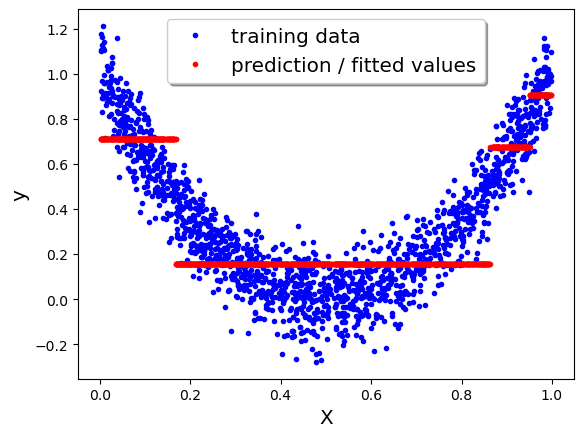

In [187]:
# Plot the training data (noisy quadratic dataset) and the model prediction
plt.plot(X_train,y_train,'b.', label = 'training data')
plt.xlabel('X', fontsize='x-large')
plt.ylabel('y', fontsize='x-large')

plt.plot(X_train, tree_reg.predict(X_train), "r.", label = 'prediction / fitted values')
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

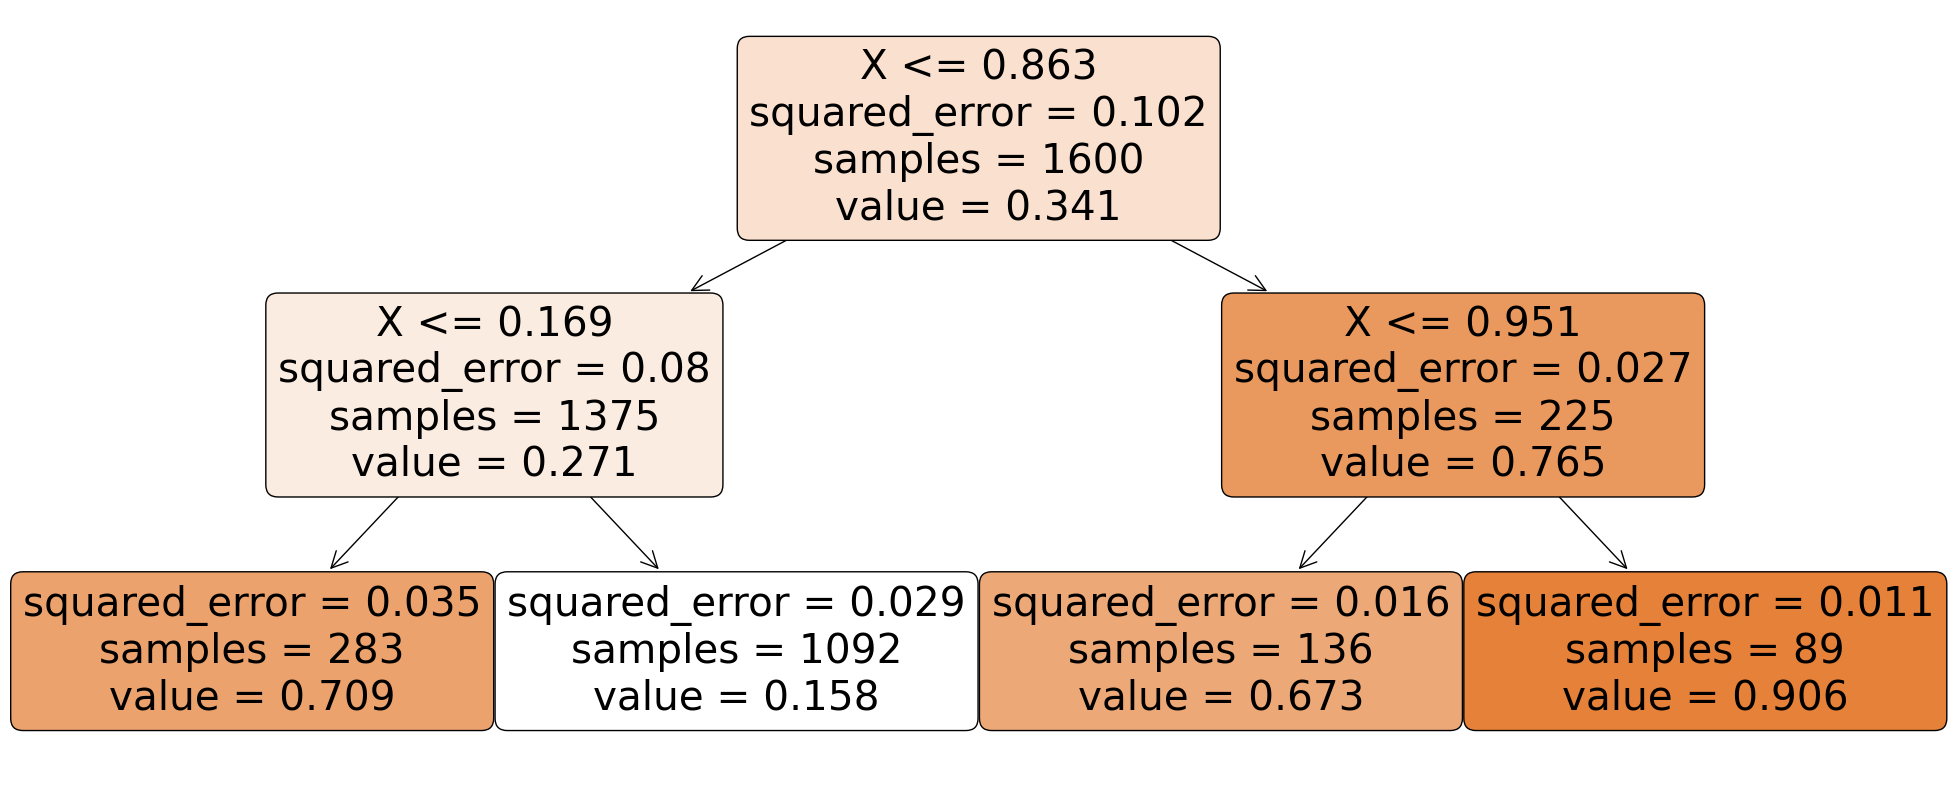

In [188]:
plt.figure(figsize=(25,10))
tree.plot_tree(tree_reg,
               feature_names ='X',
                rounded = True,
                filled= True)
plt.savefig('regression_tree.png',format='png')
plt.show() 

In [189]:
#training mse
train_mse = mean_squared_error(tree_reg.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(tree_reg.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  0.028180709694158458
the testing mean squared error is:  0.031192880169532426


In [190]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = tree_reg.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

test_R2 = tree_reg.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.7242918366508643
testing R^2 value is:  0.6714731848440738


## evaluate and improve the model

In [191]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(tree_reg, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-0.02826494 -0.0286508  -0.02771964 -0.02826214 -0.02801595]
test_score:  [-0.02714787 -0.02912231 -0.02789026 -0.03137101 -0.03179554]


In [192]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

cross val training mean_squared_error is: 0.028182692435410668
cross val testing mean_squared_error is: 0.02946539757583978


In [193]:
# Use GridSearch to find the best combination of model hyperparameters
param_grid = { "criterion" : ["mse", "mae"],
 "min_samples_leaf" : [1, 5, 10],
 "min_samples_split" : [2, 4, 10, 12, 16],
 'max_depth' : [2,3,4,5,6,7]}
gs = GridSearchCV(tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


-0.011208458602172178
{'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}


C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [194]:
# Create the final Decision Tree Regressor using the best hyperparameters
tree_reg = tree.DecisionTreeRegressor(criterion='mae', max_depth = 7, min_samples_leaf = 5, min_samples_split=2)
tree_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', max_depth=7, min_samples_leaf=5)

In [195]:
 # Evaluate the Model by calculating training mse and testing mse
#training mse
train_mse = mean_squared_error(tree_reg.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(tree_reg.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)


the training mean squared error is:  0.009097075185338558
the testing mean squared error is:  0.013782851845131415


In [196]:
# Convert data to DMatrix format
dt_train = xgb.DMatrix(X_train, label=y_train)
dt_test = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {'objective':'reg:squarederror', 'eval_metric':'rmse'}

# Train the model
dt_xgb = xgb.train(param, dt_train, num_boost_round=100)

# Make predictions on the test set
y_pred = dt_xgb.predict(dt_test)

In [197]:
r2_score(y_test, y_pred)

0.8513093315904283

In [198]:
# adaboost
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                            n_estimators=100, 
                            learning_rate=1.0)

ada_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100)

In [199]:
ada_reg.estimator_weights_

array([1.08297927, 1.10238922, 0.84683356, 0.54908143, 0.62521623,
       0.68156995, 0.51977566, 0.39221518, 0.52790135, 0.4277499 ,
       0.41411526, 0.25665806, 0.1608726 , 0.18201719, 0.31007418,
       0.16668539, 0.28930442, 0.3409075 , 0.08762753, 0.03960571,
       0.02646977, 0.04192725, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [200]:
y_pred = ada_reg.predict(X_test)

In [201]:
r2_score(y_test, y_pred)

0.8738935927583967

In [202]:
#  Calculated the fitted values for training set
y_fitted = ada_reg.predict(X_train)
# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(ada_reg.score(X_train, y_train), '(Train R^2 Value)') 

0.09981318171608954 (Train RMSE)
0.9025294316351593 (Train R^2 Value)


In [203]:
#  calculated the predicated value for testing data
y_pred = ada_reg.predict(X_test)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(ada_reg.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

0.10942357588134168 (Test RMSE)
0.8738935927583967 (Test R^2 Value)


In [204]:
#pasting
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

In [205]:
bag_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 n_estimators=500, n_jobs=-1)

In [206]:
y_pred = bag_reg.predict(X_test)

In [207]:
r2_score(y_test, y_pred)

0.7919712832043707

In [208]:
#bagging
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           # perform a sampling from the training data with replacement, that is bagging
                           bootstrap = True,
                           max_samples = 0.8,
                           n_jobs = -1,
                           oob_score = True)

#Use BaggingRegressor to fit on the training data. Once we have a fully-trained model, because we set oob_score to True, you can access the oob_score property on this model to get an evaluation score.
bag_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [209]:
bag_reg.oob_score_

0.8679242637180125

In [210]:
y_pred = bag_reg.predict(X_test)

r2_score(y_test, y_pred)

0.8403470471963824

## random forest

## build the model

In [211]:
rf_reg = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)

rf_reg.fit(X_train, y_train)

C:\Users\gwenx\AppData\Local\Temp\ipykernel_99212\1585252117.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(max_leaf_nodes=12, n_estimators=600, n_jobs=-1)

In [212]:
# Once we have trained our model, we can use it for prediction. The final predicted value from this RandomForestRegressor is the average of all of the individual models in the ensemble.
y_pred = rf_reg.predict(X_test)

In [213]:
r2_score(y_test, y_pred)

0.8689790556884784

## evaluate and improve the model

In [214]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf_reg, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-0.01038841 -0.01022904 -0.0102833  -0.00975674 -0.01013993]
test_score:  [-0.00999274 -0.01118496 -0.01092841 -0.01298138 -0.01134996]


In [215]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

cross val training mean_squared_error is: 0.010159484946163581
cross val testing mean_squared_error is: 0.011287491188085278


In [216]:
# Setting max_depth from 2 to 9 (8 different values)
# Training & evaluating the model 8 times with different max_depth value
# Store both simple split measures (train_mse & test_mse) and 
# cross validation measures (cross_val_train_mse & cross val_test_mse) into arrays

depth_range = range(2,10)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=d,random_state=1, n_estimators=20)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_mse.append(mean_squared_error(rf_reg.predict(X_train), y_train))
    test_mse.append(mean_squared_error(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))
    

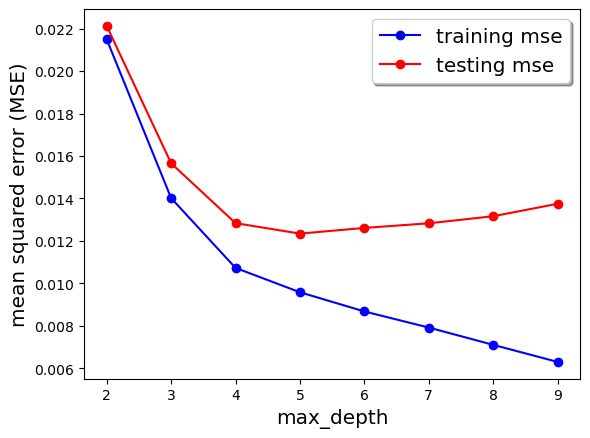

In [217]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

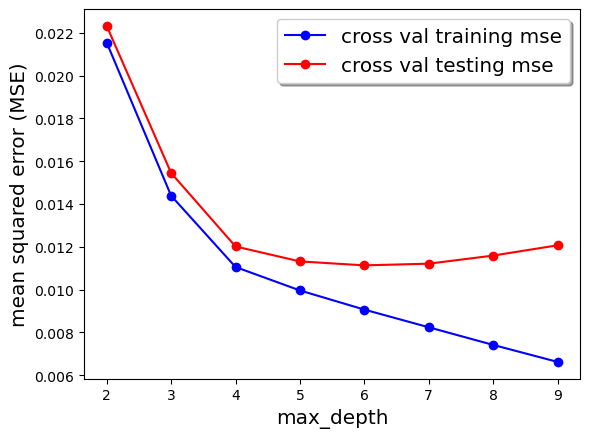

In [218]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [219]:
print('***Final Model***')
rf_reg_final = RandomForestRegressor(max_depth=5,random_state=1, n_estimators=20)
rf_reg_final.fit(X_train, y_train.ravel()) 
print('training mse: ', mean_squared_error(rf_reg_final.predict(X_train), y_train))
print('testing mse: ', mean_squared_error(rf_reg_final.predict(X_test), y_test))
    
results  = cross_validate(rf_reg_final, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))


***Final Model***
training mse:  0.009582995911544961
testing mse:  0.012344919969897864
cross val training mse: 0.009959313771995533
cross val testing mse: 0.011315745713622196


In [220]:
# Use GridSearch to find the best combination of model hyperparameters
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [5, 10, 15]}
gs = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

0.8919472401320659
{'max_depth': 5, 'n_estimators': 100}


C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [221]:
# Create the final Random Forest Regressor using the best hyperparameters
rf_reg = RandomForestRegressor(max_depth = 5, n_estimators = 50)
rf_reg.fit(X_train, y_train)

C:\Users\gwenx\AppData\Local\Temp\ipykernel_99212\3239038876.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=50)

In [222]:
 # Evaluate the Model by calculating training mse and testing mse
#training mse
train_mse = mean_squared_error(rf_reg.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(rf_reg.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)


the training mean squared error is:  0.009590065307545505
the testing mean squared error is:  0.012453351466748398


In [223]:
# Convert data to DMatrix format
rf_train = xgb.DMatrix(X_train, label=y_train)
rf_test = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {'objective':'reg:squarederror', 'eval_metric':'rmse'}

# Train the model
rf_xgb = xgb.train(param, rf_train, num_boost_round=100)

# Make predictions on the test set
y_pred = rf_xgb.predict(rf_test)

In [224]:
r2_score(y_test, y_pred)

0.8513093315904283

In [225]:
# adaboost
ada_reg = AdaBoostRegressor(RandomForestRegressor(max_depth=4), 
                            n_estimators=100, 
                            learning_rate=1.0)

ada_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=4),
                  n_estimators=100)

In [226]:
ada_reg.estimator_weights_

array([1.1659592 , 0.92786158, 0.76445508, 0.58500828, 0.7081869 ,
       0.53788725, 0.28321702, 0.23941518, 0.39460583, 0.20303819,
       0.28535643, 0.33076547, 0.11094751, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [227]:
y_pred = ada_reg.predict(X_test)

In [228]:
r2_score(y_test, y_pred)

0.8738540112676545

In [326]:
#  Calculated the fitted values for training set
y_fitted = rf_reg.predict(X_train_new)
# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train_new)), '(Train RMSE)') # RMSE: the lower the better
print(rf_reg.score(X_train_new, y_train_new), '(Train R^2 Value)') 

In [327]:
#  calculated the predicated value for testing data
y_pred = rf_reg.predict(X_test_new)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test_new)), '(Test RMSE)') # RMSE: the lower the better
print(rf_reg.score(X_test_new, y_test_new), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

In [231]:
#pasting
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

In [232]:
bag_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 n_estimators=500, n_jobs=-1)

In [233]:
y_pred = bag_reg.predict(X_test)

In [234]:
r2_score(y_test, y_pred)

0.7919712832043707

In [235]:
#bagging
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           # perform a sampling from the training data with replacement, that is bagging
                           bootstrap = True,
                           max_samples = 0.8,
                           n_jobs = -1,
                           oob_score = True)

#Use BaggingRegressor to fit on the training data. Once we have a fully-trained model, because we set oob_score to True, you can access the oob_score property on this model to get an evaluation score.
bag_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [236]:
bag_reg.oob_score_

0.8673710013094836

In [237]:
y_pred = bag_reg.predict(X_test)

r2_score(y_test, y_pred)

0.8401952480201614

## ANN Model

## build the model

In [239]:
# create the MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
# fit the model to the data
mlp.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)

In [240]:
# make predictions on the test data
y_pred = mlp.predict(X_train)

In [241]:
# evaluate the model's performance
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09650405091295135


In [242]:
#training mse
train_mse = mean_squared_error(mlp.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(mlp.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  0.09650405091295135
the testing mean squared error is:  0.08962063249548143


In [243]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = mlp.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

test_R2 = mlp.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.055845118106567004
testing R^2 value is:  0.056105726499780184


## evaluate and improve the model

In [244]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(mlp, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-0.02300096 -0.0175612  -0.01809963 -0.1071401  -0.01838686]
test_score:  [-0.01926018 -0.01598772 -0.01952738 -0.11309019 -0.0187746 ]


In [245]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

cross val training mean_squared_error is: 0.03683774870728903
cross val testing mean_squared_error is: 0.03732801242632432


In [246]:
# Use GridSearch to find the best combination of model hyperparameters
# define the hyperparameters to tune
param_grid = {'hidden_layer_sizes': [(10,), (20,), (30,)],
              'activation': ['relu', 'tanh', 'logistic'],
              'solver': ['adam', 'sgd'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate_init': [0.01, 0.001, 0.0001]}
gs = GridSearchCV(mlp, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.010990073962710735
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [247]:
# Create the final MLP Regressor using the best hyperparameters
mlp = MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.01, solver='adam')
mlp.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=30, learning_rate_init=0.01)

In [248]:
 # Evaluate the Model by calculating training mse and testing mse
#training mse
train_mse = mean_squared_error(mlp.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(mlp.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)


the training mean squared error is:  0.010379407137512387
the testing mean squared error is:  0.01150418258865467


In [249]:
# Convert data to DMatrix format
mlp_train = xgb.DMatrix(X_train, label=y_train)
mlp_test = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {'objective':'reg:squarederror', 'eval_metric':'rmse'}

# Train the model
mlp_xgb = xgb.train(param, mlp_train, num_boost_round=100)

# Make predictions on the test set
y_pred = mlp_xgb.predict(mlp_test)

In [250]:
r2_score(y_test, y_pred)

0.8513093315904283

In [251]:
# adaboost
ada_reg = AdaBoostRegressor(MLPRegressor(), 
                            n_estimators=100, 
                            learning_rate=1.0)

ada_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=MLPRegressor(), n_estimators=100)

In [252]:
ada_reg.estimator_weights_

array([1.1690358 , 0.93140714, 0.70076246, 0.61406812, 0.55238088,
       0.35490657, 0.25009578, 0.13623567, 0.26909153, 0.09643555,
       0.14234345, 0.04211416, 0.11888605, 0.13685625, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [253]:
y_pred = ada_reg.predict(X_test)

In [254]:
r2_score(y_test, y_pred)

0.8676537779023107

In [255]:
#  Calculated the fitted values for training set
y_fitted = ada_reg.predict(X_train)
# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(ada_reg.score(X_train, y_train), '(Train R^2 Value)') 

0.10619933194381093 (Train RMSE)
0.8896578939967539 (Train R^2 Value)


In [256]:
#  calculated the predicated value for testing data
y_pred = ada_reg.predict(X_test)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(ada_reg.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

0.11209806111853027 (Test RMSE)
0.8676537779023107 (Test R^2 Value)


In [257]:
#pasting
bag_reg = BaggingRegressor(MLPRegressor(), 
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

In [258]:
bag_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=MLPRegressor(), bootstrap=False,
                 n_estimators=500, n_jobs=-1)

In [259]:
y_pred = bag_reg.predict(X_test)

In [260]:
r2_score(y_test, y_pred)

0.8456052074541403

In [261]:
#bagging
bag_reg = BaggingRegressor(MLPRegressor(), 
                           n_estimators = 500,
                           # perform a sampling from the training data with replacement, that is bagging
                           bootstrap = True,
                           max_samples = 0.8,
                           n_jobs = -1,
                           oob_score = True)

#Use BaggingRegressor to fit on the training data. Once we have a fully-trained model, because we set oob_score to True, you can access the oob_score property on this model to get an evaluation score.
bag_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=MLPRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [262]:
bag_reg.oob_score_

0.8636642395555937

In [263]:
y_pred = bag_reg.predict(X_test)

r2_score(y_test, y_pred)

0.8402623219650229

## SVM model

## build the model

In [264]:
# create the SVM regressor
svr = SVR(kernel='rbf')

# fit the model to the data
svr.fit(X_train, y_train)


C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [265]:
# make predictions on the test data
y_pred = svr.predict(X_train)

In [266]:
# evaluate the model's performance
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.010201692974473264


In [267]:
#training mse
train_mse = mean_squared_error(svr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(svr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  0.010201692974473264
the testing mean squared error is:  0.011424845656160134


In [268]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = svr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

test_R2 = svr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.9001909439623927
testing R^2 value is:  0.8796722798065822


## evaluate and improve the model

In [269]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(svr, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-0.01071491 -0.0104448  -0.01057881 -0.00999209 -0.01044308]
test_score:  [-0.00956091 -0.01038579 -0.0099622  -0.01229767 -0.0104147 ]


In [270]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

cross val training mean_squared_error is: 0.010434739696155593
cross val testing mean_squared_error is: 0.010524254131321128


In [271]:
# Use GridSearch to find the best combination of model hyperparameters
# define the hyperparameters to tune
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10],
              'epsilon': [0.01, 0.1, 1]}
gs = GridSearchCV(svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.01026665631439477
{'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}


In [272]:
# Create the final SVM Regressor using the best hyperparameters
svr = SVR(kernel='rbf', C=1 , epsilon=0.01)
svr.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, epsilon=0.01)

In [273]:
 # Evaluate the Model by calculating training mse and testing mse
#training mse
train_mse = mean_squared_error(svr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(svr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)


the training mean squared error is:  0.010193249637847922
the testing mean squared error is:  0.011427611183905282


In [274]:
# Convert data to DMatrix format
svr_train = xgb.DMatrix(X_train, label=y_train)
svr_test = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {'objective':'reg:squarederror', 'eval_metric':'rmse'}

# Train the model
svr_xgb = xgb.train(param, svr_train, num_boost_round=100)

# Make predictions on the test set
y_pred = svr_xgb.predict(svr_test)

In [275]:
r2_score(y_test, y_pred)

0.8513093315904283

In [276]:
# adaboost
ada_reg = AdaBoostRegressor(SVR(), 
                            n_estimators=100, 
                            learning_rate=1.0)

ada_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=SVR(), n_estimators=100)

In [277]:
ada_reg.estimator_weights_

array([1.22076121, 0.9379222 , 0.78775446, 0.58446438, 0.34973039,
       0.32599336, 0.31763154, 0.14760768, 0.10360517, 0.11940026,
       0.24943986, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [278]:
y_pred = ada_reg.predict(X_test)

In [279]:
r2_score(y_test, y_pred)

0.8790048583892133

In [281]:
#  calculated the predicated value for testing data
y_pred = ada_reg.predict(X_test)
# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(ada_reg.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

0.107183094816756 (Test RMSE)
0.8790048583892133 (Test R^2 Value)


In [282]:
print('***Final Model***')
svr_final = SVR()
svr_final.fit(X_train, y_train.ravel()) 
print('training mse: ', mean_squared_error(svr_final.predict(X_train), y_train))
print('testing mse: ', mean_squared_error(svr_final.predict(X_test), y_test))
    
results  = cross_validate(svr_final, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))


***Final Model***
training mse:  0.010201692974473264
testing mse:  0.011424845656160134
cross val training mse: 0.010434739696155593
cross val testing mse: 0.010524254131321128


In [283]:
#pasting
bag_reg = BaggingRegressor(SVR(), 
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

In [284]:
bag_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=SVR(), bootstrap=False, n_estimators=500,
                 n_jobs=-1)

In [285]:
y_pred = bag_reg.predict(X_test)

In [286]:
r2_score(y_test, y_pred)

0.8796722798065822

In [287]:
#bagging
bag_reg = BaggingRegressor(SVR(), 
                           n_estimators = 500,
                           # perform a sampling from the training data with replacement, that is bagging
                           bootstrap = True,
                           max_samples = 0.8,
                           n_jobs = -1,
                           oob_score = True)

#Use BaggingRegressor to fit on the training data. Once we have a fully-trained model, because we set oob_score to True, you can access the oob_score property on this model to get an evaluation score.
bag_reg.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=SVR(), max_samples=0.8, n_estimators=500,
                 n_jobs=-1, oob_score=True)

In [288]:
bag_reg.oob_score_

0.8991485815725346

In [289]:
y_pred = bag_reg.predict(X_test)

r2_score(y_test, y_pred)

0.879673796973626

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Create Extra Trees Regressor model
et_reg = ExtraTreesRegressor()
et_reg.fit(X_train, y_train)

# Calculated the fitted values for training set
y_fitted = et_reg.predict(X_train)
# Calculated the MSE and R^2 for training set
print(mean_squared_error(y_fitted, y_train), '(Train MSE)') # MSE: the lower the better
print(et_reg.score(X_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

# calculated the predicated value for testing data
y_pred = et_reg.predict(X_test)

# Calculated the MSE and R^2 for testing set
print(mean_squared_error(y_pred, y_test), '(Test MSE)') # MSE: the lower the better
print(et_reg.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

### 2.3 Evaluate and Improve the Model(s)

In [290]:
from sklearn.ensemble import VotingRegressor

In [291]:
# create the voting regressor
vr = VotingRegressor([('lm', lm), ('rf', rf_reg), ('dt', tree_reg), ('mlp', mlp), ('svr', svr)])

In [292]:
#voting estimators
vr.estimators

[('lm', LinearRegression()),
 ('rf', RandomForestRegressor(max_depth=5, n_estimators=50)),
 ('dt',
  DecisionTreeRegressor(criterion='mae', max_depth=7, min_samples_leaf=5)),
 ('mlp', MLPRegressor(hidden_layer_sizes=30, learning_rate_init=0.01)),
 ('svr', SVR(C=1, epsilon=0.01))]

In [293]:
# to access and look up your estimators by name, you have a dictionary named named_estimators as well.
# This gives you the individual predictors that make up your model by name, the name that you have specified when you set up the voting classifier

vr.named_estimators

{'lm': LinearRegression(),
 'rf': RandomForestRegressor(max_depth=5, n_estimators=50),
 'dt': DecisionTreeRegressor(criterion='mae', max_depth=7, min_samples_leaf=5),
 'mlp': MLPRegressor(hidden_layer_sizes=30, learning_rate_init=0.01),
 'svr': SVR(C=1, epsilon=0.01)}

In [294]:
# fit the voting regressor to the data
vr.fit(X_train, y_train)

C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


VotingRegressor(estimators=[('lm', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_depth=5,
                                                   n_estimators=50)),
                            ('dt',
                             DecisionTreeRegressor(criterion='mae', max_depth=7,
                                                   min_samples_leaf=5)),
                            ('mlp',
                             MLPRegressor(hidden_layer_sizes=30,
                                          learning_rate_init=0.01)),
                            ('svr', SVR(C=1, epsilon=0.01))])

In [295]:
# make predictions on new data
y_pred = vr.predict(X_test)

In [296]:
# calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# cross validate the model
scores = cross_val_score(vr, X, y, cv=10)
print("Cross validation scores: ", scores)
print("Mean cross validation score: ", scores.mean())

Mean Squared Error:  0.015462777265414996
R-squared:  0.8371443438097753


C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gwenx\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:

Cross validation scores:  [0.87630178 0.84832954 0.86903156 0.84718912 0.86252558 0.85949547
 0.85009415 0.82739701 0.85053498 0.84652747]
Mean cross validation score:  0.8537426649289646
